Loading and reading in text data

### Creating Tokens

In [2]:
with open ("the-verdict.txt",'r',encoding="utf-8") as f :
    raw_text=f.read()
print("Total number of characters:",len(raw_text))
print(raw_text[:99])

Total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [3]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)


['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [4]:


result = re.split(r'([,.]|\s)', text)

print(result)



['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [5]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [6]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)


['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [7]:


preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])



['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [8]:
print(len(preprocessed))

4690


In [9]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)


1130


In [10]:
vocab = {token:integer for integer,token in enumerate(all_words)}


In [11]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break


('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [12]:
class SimpleTokenizerV1:
    def __init__(self,vocab):
        self.str_to_int=vocab
        self.int_to_str={i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed= re.split(r'(,.:;?!"()\']|--|\s)',text)
        preprocessed=[item.strip() for item in preprocessed if item.strip()]
        ids=[self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self,ids):
        text=" ".join([self.int_to_str[i] for i in ids])
        text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)
        return text

In [13]:
class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int=vocab
        self.int_to_str={i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed=[item.strip() for item in preprocessed if item.strip()]
        preprocessed=[
            item if item in self.str_to_int 
            else "<|unk|>" for item in preprocessed
        ]
        ids=[self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self,ids):
        text=" ".join([self.int_to_str[i] for i in ids])
        text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)
        return text 

In [14]:
tokenizer= SimpleTokenizerV2(vocab)
text="Hello It's the last time I am going to see you"
ids=tokenizer.encode(text)
print(ids)

KeyError: '<|unk|>'

In [15]:
tokenizer.decode(ids)

NameError: name 'ids' is not defined

In [16]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}


## Bytepair Encoding simillar to Gpt-2

In [19]:
pip install tiktoken

  Using cached tiktoken-0.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached tiktoken-0.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import tiktoken

In [21]:
tokenizer=tiktoken.get_encoding("gpt2")
text="Hi hello how are you? <|endoftext|> The world is a beautiful place"
integers=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[17250, 23748, 703, 389, 345, 30, 220, 50256, 383, 995, 318, 257, 4950, 1295]


In [22]:
string=tokenizer.decode(integers)
print(string)

Hi hello how are you? <|endoftext|> The world is a beautiful place


### Create input output pairs

In [23]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))



5145


In [24]:
enc_sample = enc_text[50:]

In [25]:
context_size = 4
#length of the input
# model looks at the 4 words and then predict the next word

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [26]:
for  i in range(1,context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]
    print(context,"---->",desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [27]:
for  i in range(1,context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]
    print(tokenizer.decode(context),"---->",tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


### Implementing a data loader

In [28]:
import torch 

In [29]:
from torch.utils.data import Dataset,DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self,txt,tokenizer,max_length,stride):
        self.input_ids=[] #input chunk 
        self.target_ids=[] #output chunk 

        token_ids=tokenizer.encode(txt,allowed_special={"<|endoftext|>"})
        assert len(token_ids)>max_length,"Number of token_ids must be atleast equal to max_length + 1"
        #sliding window 
        for i in range(0,len(token_ids)-max_length,stride): 
            input_chunk=token_ids[i:i+max_length]
            output_chunk=token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(output_chunk))
    def __len__(self):
        return len(self.input_ids)
    def __getitem__(self,idx):
        return self.input_ids[idx], self.target_ids[idx] #mapping dataset map each input to corresponding output

In [30]:
def create_dataloader_v1(txt,batch_size=4,  #batch_size=4 no of elements in a training batch , stride=128 means the amount of movement of the window
            max_length=256,stride=128,shuffle=True,drop_last=True,num_workers=0): # drop last is done so that the last batch of the training set may be ignored as if the batch size< 4 causes problem num_workers is the number of cpu threads that can be run simultaneously
            tokenizer=tiktoken.get_encoding("gpt2") #tokenizer initiated
            dataset=GPTDatasetV1(txt,tokenizer,max_length,stride) #dataset made
            dataloader= DataLoader( #create dataloader
                dataset,
                batch_size=batch_size,
                shuffle=shuffle,
                drop_last=drop_last,   #this dataloaderV1 and then from getitems it gives out a input output
                num_workers=num_workers
            )
            return dataloader

             

testing the dataloader

In [31]:
with open("the-verdict.txt","r",encoding="utf_8") as f:
    raw_text=f.read()

In [32]:
import tiktoken
dataloader=create_dataloader_v1(
    raw_text,batch_size=1,max_length=4,stride=1,shuffle=False
)
data_iter=iter(dataloader)
first_batch=next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [33]:
second_batch=next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [34]:
dataloader=create_dataloader_v1(raw_text,batch_size=8,max_length=4,stride=4,shuffle=False)
data_iter=iter(dataloader)
inputs,targets=next(data_iter)
print("Inputs:\n",inputs)
print("Targets:\n",targets)
# each of the tensor contains 4 tokens since the max_length is also 4

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


### Token embeddings

In [35]:
input_ids = torch.tensor([2, 3, 5, 1]) #consider they are token ids 

In [36]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123) #generate random in any device
embedding_layer = torch.nn.Embedding(vocab_size, output_dim) #embedding layer of 6*3

In [37]:
print(embedding_layer.weight) #embedding layer is an efficient way to implement one hot encoding

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [38]:
print(embedding_layer(torch.tensor([3]))) #convert token id 3 into a vector of 3 dimension and print it 

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [39]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


### Positional Encoding

In [40]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)


In [41]:


max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)



In [42]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)


Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [43]:
token_embedding=token_embedding_layer(inputs)
# print(token_embedding) # 50257 *256 50257 tokens and 256 dimensions
print(token_embedding.shape)

torch.Size([8, 4, 256])


In [44]:
context_length = max_length #another embedding layer because gpt 2 uses position embeddings
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
print(pos_embedding_layer.weight)

Parameter containing:
tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
        [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
       requires_grad=True)


In [45]:
pos_embedding=pos_embedding_layer(torch.arange(max_length))
print(pos_embedding.shape)
print(pos_embedding)

torch.Size([4, 256])
tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
        [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
       grad_fn=<EmbeddingBackward0>)


In [46]:
#input embedding will be posn embedding + token embedding 
input_embedding=pos_embedding+token_embedding
print(input_embedding.shape)
# print(input_embedding)

torch.Size([8, 4, 256])


### Attention

In [47]:
## we have completed preprocessing, tokenization , and token embeddings with positional embeddings
#simple self attention mechanism without trainable weights
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)


In [48]:
query = inputs[1]  # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print(attn_scores_2)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [49]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
#normalising
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [50]:
#softmax normalization
# e^x /(e^x1+....e^xt)
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)# summation of eac row   

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [51]:
#pytorch softmax because naive softmax can have underflow or overflow
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [52]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)# final context vector

tensor([0.4419, 0.6515, 0.5683])


In [53]:
#this is for just 'journey' now lets do this for each text
attn_scores = torch.empty(len(inputs), len(inputs))

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [54]:
#the above operation works but is very complex and not scalable
#but according to linear algebra
attn_score = inputs @ inputs.T
print(attn_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [55]:
attn_weights=torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [56]:
all_context_vecs= attn_weights @ inputs
print(all_context_vecs) #literally the same scaling operation as before(write down and check)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


#### if we can do this then why do we need trainable weights? 
because there is meaning in the current sentence, like here there is almost no relation between one and journey but consider there might be in this specific context, so to represent that we need to have trainable weights

##### eg: the cat sat on the mat because it was warm -> if warm is the query then mat needs to have a higher attention score 

In [57]:
# implementing self-attention with trainable weights


x_2 = inputs[1] # second input element
d_in = inputs.shape[1] # the input embedding size, d=3
d_out = 2 # the output embedding size, d=2

#in gpt like models the input and output dimensions are same

In [58]:
#initialize weight matrices 
torch.manual_seed(123)
# we need to learn how to convert input vectors into key query and value vectors
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

#when using weight matrices for model training 
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [59]:


query_2 = x_2 @ W_query # x_2 because it's with respect to the 2nd input element
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value

print(query_2)



tensor([0.4306, 1.4551])


In [60]:
keys = inputs @ W_key 
values = inputs @ W_value
queries= inputs @ W_query

print("keys.shape:", keys.shape)
print("values.shape:", values.shape)
print("query.shape:", queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
query.shape: torch.Size([6, 2])


In [61]:
#calcultating attention score

keys_2 = keys[1] # Python starts index at 0
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)



tensor(1.8524)


In [62]:
attn_scores_2= query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [63]:
attn_scores =  queries @ keys.T #all queries with attention 
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [64]:
# now normalisation 
# attention weights- they should sum up to 1
# first scale by root d-keys and then softmax
#why dividibng with root of d_k? it gives a stable output
#relared to variance
d_k= keys.shape[-1]
attn_weights_2=torch.softmax(attn_scores_2/d_k**0.5,dim =-1)
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [65]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


### Creating a self attention python class

In [66]:
import torch.nn as nn

class SelfAttention_V1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query=nn.Parameter(torch.rand(d_in,d_out))
        self.W_key=nn.Parameter(torch.rand(d_in,d_out))
        self.W_value=nn.Parameter(torch.rand(d_in,d_out))
    
    def forward(self,x):
        keys=x @ self.W_key
        queries=x @ self.W_query
        values=x @ self.W_value
        attn_score=queries @ keys.T
        attn_weights=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        context_vec= attn_weights @ values
        return context_vec

In [67]:
torch.manual_seed(123)
sa_v1=SelfAttention_V1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [68]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias) #stable
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

In [69]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out) #weight initialization is more sophisticates
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


### Causal Attention 

In [70]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)


In [71]:
# mask out future tokens
# we mask out the attention weights above the diagonal and then we normalise the attention weights
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores= queries @ keys.T
attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim =-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [72]:
# now we generate a mask 
# so we basically have the output(attention weights) and then mask it then normalize rows
context_length= attn_scores.shape[0]
mask_simple=torch.tril(torch.ones(context_length,context_length))# tril creates a lower triangular matrix
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [73]:
masked_simple= attn_weights * mask_simple #canceling influence of future tokens (data leakage) this is bad
print(masked_simple) #now normalise it to have each row sum = 1

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [74]:
row_sums=masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums 
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [75]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf) #fill the positive values with -inf
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [77]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


### Making additional attention weights with dropout

In [78]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [79]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


### Causal Attention Class

In [80]:
#code should be able to handle batches
# we will simulate batch inputs for now we are using 2 inputs with 6 tokens and each token has embedding dimension of 3
batch = torch.stack((inputs, inputs),dim=0)
print(batch.shape)
# the causal attention class will be simillar to self attention but we now have dropout and causal masks

torch.Size([2, 6, 3])


In [81]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

In [82]:
torch.manual_seed(123)
context_length=batch.shape[1]
ca = CausalAttention(d_in,d_out,context_length,0.0)
context_vecs=ca(batch)
print("Context_vecs.shape:",context_vecs.shape) 

Context_vecs.shape: torch.Size([2, 6, 2])


In [83]:
print(context_vecs)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


### Multihead Attention 

In [84]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs),dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [85]:
#part 1(one type of mutihead attention)
# divide attention mechanism into "multiple heads" each operating independently 
# instead of a single key,query and value matrix we have multiple (for now lets just say 2)
# hence we get 2 attention weights and then 2 context vectors that will be then combined to a single vector

# consider each context vec to have 6 x 2 dimension so the combined context vector will have the dimension 6 x 4
import torch.nn as nn
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)



In [86]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)
# this current system works well but the single heads are processed sequentially and then aggregated, we can improve them by making this in parallel

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### Implementing multihead attention with weight splits

In [87]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        # we have to group by the number of heads
        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [88]:
torch.manual_seed(123)
inputs=torch.tensor(
    [[0.43,0.15,0.89,0.55,0.87,0.66],
     [0.57,0.85,0.64,0.22,0.58,0.33],
     [0.77,0.25,0.10,0.05,0.80,0.55]]
)
batch=torch.stack((inputs,inputs),dim=0)
print(batch.shape)
batch_size,context_length,d_in=batch.shape
d_out=6
mha=MultiHeadAttention(d_in,d_out,context_length,0.0,num_heads=2)
context_vecs=mha(batch)
print(context_vecs)
print("Context_vecs Shape:",context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
Context_vecs Shape: torch.Size([2, 3, 6])


## Implementing GPT model to generate text

In [89]:
# we are going to make a placeholder for gpt model
GPT_CONFIG_124M={
    "vocab_size": 50257, #vocabulary
    "context_length": 1024, 
    "emb_dim": 768, #embedding dimension
    "n_heads": 12, #no of attention heads
    "n_layers": 12, #no of layers
    "drop_rate": 0.1, #dropout rate 
    "qkv_bias": False #Query-key-value bias
}

### Dummy GPT Model Class

In [90]:
import torch
import torch.nn as nn
class DummyGPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
        self.pos_emb=nn.Embedding(cfg["context_length"],cfg["emb_dim"])
        self.drop_emb=nn.Dropout(cfg["drop_rate"])

        #placeholder transformer
        self.trf_blocks=nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        #placeholder layernorm 
        self.final_norm =DummyLayerNorm(cfg["emb_dim"])
        self.out_head=nn.Linear(
            cfg["emb_dim"],cfg["vocab_size"],bias=False
        )
    def forward(self,in_idx):
        batch_size,seq_len=in_idx.shape
        tok_embeds=self.tok_emb(in_idx)
        pos_indices = torch.arange(seq_len, device=in_idx.device)
        pos_embeds = self.pos_emb(pos_indices)
        # pos_embeds=self.pos_emb(in_idx)
        x=tok_embeds+pos_embeds
        x=self.drop_emb(x)
        x=self.trf_blocks(x)
        x=self.final_norm(x)
        logits=self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        #placeholder
    def forward(self,x):
        #nothing happens here just returning the input
        return x

class DummyLayerNorm(nn.Module):
    def  __init__(self,normalized_shape,eps=1e-5):
        super().__init__()

    def forward(self,x):
        return x

In [91]:
#tokenization 
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")
batch=[]
txt1="Every effort moves you"
txt2="Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch= torch.stack(batch,dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [92]:
#create an instance of dummygpt
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits=model(batch)
print("Output shape:",logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


In [93]:
# Layer normalisation is done so that to prevent the gradient magnitudes to be too large or too small
# internal covariate shift : as training proceeds inputs to each layer can change, this delays convergence 
torch.manual_seed(123)
batch_example=torch.randn(2,5)
layer=nn.Sequential(nn.Linear(5,6),nn.ReLU())
out= layer(batch_example)
print(out)
# it is done before and after the multi-head attention  module and before final output layer
# mean=0 variance =1
# this is a linear layer followed by a ReLu activation layer

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [94]:
mean = out.mean(dim=-1,keepdim=True)
var=out.var(dim=-1,keepdim=True)
print("Mean:",mean)
print("Variance:",var)

Mean: tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance: tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [95]:
out_norm =(out - mean)/torch.sqrt(var)
mean=out_norm.mean(dim = -1, keepdim = True)
var=out_norm.var(dim = -1, keepdim = True)
print("Normalized Layer outputs:\n", out_norm)
print("Mean:\n",mean)
print("Variance:\n",var)

Normalized Layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [96]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n",mean)
print("Variance:\n",var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [97]:
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps=1e-5
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))

    def forward(self,x):
        mean=x.mean(dim=-1,keepdim=True)
        var=x.var(dim=-1,keepdim=True,unbiased=False)
        norm_x=(x-mean)/torch.sqrt(var+self.eps)
        return self.scale * norm_x + self.shift
        # when unbiased= True then we get bessels correction where the denominator is n-1 not n 

In [98]:
ln = LayerNorm (emb_dim=5)
out_ln=ln(batch_example)
mean = out_ln.mean(dim=-1,keepdim=True)
var=out_ln.var(dim=-1,unbiased=False,keepdim=True)
print("Mean:\n",mean)
print("Variance:\n", var)


Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


### Gelu activation 

In [99]:
class GELU(nn.Module):
    def __init__(self):
       super().__init__()
    def forward (self,x):
       return 0.5 * x * (1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(x+ 0.044715 * torch.pow(x,3))))  

In [100]:
class FeedForward(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(cfg["emb_dim"],4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"])
        )
    def forward(self,x):
        return self.layers(x)

In [101]:
ffn =FeedForward(GPT_CONFIG_124M)
x=torch.rand(2,3,768)
out=ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


### Shortcut Connections

In [102]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self,layer_sizes,use_shortcut):
        super().__init__()
        self.use_shortcut=use_shortcut
        self.layers=nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0],layer_sizes[1]),GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1],layer_sizes[2]),GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2],layer_sizes[3]),GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3],layer_sizes[4]),GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4],layer_sizes[5]),GELU())
        ])
    def forward(self,x):
        for layer in self.layers:
            layer_output=layer(x) #compute output of current layer
            if self.use_shortcut and x.shape == layer_output.shape:
                x=x+ layer_output
            else:
                x= layer_output
        return x



In [103]:
layer_sizes=[3,3,3,3,3,1]
sample_input=torch.tensor([[1.,0.,-1.]])
torch.manual_seed(123)
model_without_shortcut= ExampleDeepNeuralNetwork(
    layer_sizes,use_shortcut=False
)

In [104]:
def print_gradient(model, x):
    output=model(x)#forward pass
    target=torch.tensor([[0.]])

    loss=nn.MSELoss()#calculate loss
    loss=loss(output,target)

    loss.backward()#backward pass

    for name, param  in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has a gradient of {param.grad.abs().mean().item()}")


In [105]:
print_gradient(model_without_shortcut, sample_input) # vanish gradient

layers.0.0.weight has a gradient of 0.00020173584925942123
layers.1.0.weight has a gradient of 0.00012011159560643137
layers.2.0.weight has a gradient of 0.0007152040489017963
layers.3.0.weight has a gradient of 0.0013988736318424344
layers.4.0.weight has a gradient of 0.005049645435065031


In [106]:
torch.manual_seed(123)
model_with_shortcut=ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)
print_gradient(model_with_shortcut,sample_input) # no vanishing gradient

layers.0.0.weight has a gradient of 0.22169791162014008
layers.1.0.weight has a gradient of 0.20694105327129364
layers.2.0.weight has a gradient of 0.32896995544433594
layers.3.0.weight has a gradient of 0.2665732204914093
layers.4.0.weight has a gradient of 1.3258540630340576


## Transformer Block
multihead attention-->layer normalisation -->Dropout -->Feed Forward layer -->GELU activation 
##### important components in transformer block

In [107]:
GPT_CONFIG_124M={
    "vocab_size": 50257, #vocabulary
    "context_length": 1024, 
    "emb_dim": 768, #embedding dimension
    "n_heads": 12, #no of attention heads
    "n_layers": 12, #no of layers
    "drop_rate": 0.1, #dropout rate 
    "qkv_bias": False #Query-key-value bias
}

In [108]:
#combine the separate elements youve added
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps=1e-5
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))

    def forward(self,x):
        mean=x.mean(dim=-1,keepdim=True)
        var=x.var(dim=-1,keepdim=True,unbiased=False)
        norm_x=(x-mean)/torch.sqrt(var+self.eps)
        return self.scale * norm_x + self.shift
        # when unbiased= True then we get bessels correction where the denominator is n-1 not n 

class GELU(nn.Module):
    def __init__(self):
       super().__init__()
    def forward (self,x):
       return 0.5 * x * (1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(x+ 0.044715 * torch.pow(x,3))))  
        
class FeedForward(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(cfg["emb_dim"],4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"])
        )
    def forward(self,x):
        return self.layers(x)


In [109]:

class TransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.att=MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff=FeedForward(cfg)
        self.norm1=LayerNorm(cfg["emb_dim"])
        self.norm2=LayerNorm(cfg["emb_dim"])
        self.drop_shortcut=nn.Dropout(cfg["drop_rate"])
    
    def forward(self,x):
        shortcut=x
        x=self.norm1(x)
        x=self.att(x)
        x=self.drop_shortcut(x)
        x=x+shortcut

        shortcut=x
        x=self.norm2(x)
        x=self.ff(x)
        x=self.drop_shortcut(x)
        x=x+shortcut

        return x



        

In [110]:
import torch
torch.manual_seed(123)
x=torch.rand(2,4,768)
block=TransformerBlock(GPT_CONFIG_124M)
output=block(x)
print("Input Shape:",x.shape)
print("Output Shape:", output.shape)

Input Shape: torch.Size([2, 4, 768])
Output Shape: torch.Size([2, 4, 768])


### Complete GPT model

In [111]:
class GPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
        self.pos_emb=nn.Embedding(cfg["context_length"],cfg["emb_dim"])
        self.drop_emb=nn.Dropout(cfg["drop_rate"])

        self.trf_blocks=nn.Sequential(
           *[TransformerBlock(cfg) for  _ in range(cfg["n_layers"])]
        )

        self.final_norm=LayerNorm (cfg["emb_dim"])
        self.out_head=nn.Linear(
            cfg["emb_dim"],cfg["vocab_size"],bias=False
        )

    def forward(self,in_idx):
        batch_size,seq_len=in_idx.shape
        tok_embeds=self.tok_emb(in_idx)
        pos_embeds=self.pos_emb(torch.arange(seq_len,device=in_idx.device))
        x=tok_embeds+pos_embeds
        x=self.drop_emb(x)
        x=self.trf_blocks(x)
        x=self.final_norm(x)
        logits=self.out_head(x)

        return logits

In [112]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")
batch=[]
txt1="Every effort moves you"
txt2="Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch= torch.stack(batch,dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [113]:
torch.manual_seed(123)
model=GPTModel(GPT_CONFIG_124M)
out=model(batch)
print("Input batch:\n",batch)
print("\n Output shape:",out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

 Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3613,  0.4222, -0.0711,  ...,  0.3483,  0.4661, -0.2838],
         [-0.1792, -0.5660, -0.9485,  ...,  0.0477,  0.5181, -0.3168],
         [ 0.7120,  0.0332,  0.1085,  ...,  0.1018, -0.4327, -0.2553],
         [-1.0076,  0.3418, -0.1190,  ...,  0.7195,  0.4023,  0.0532]],

        [[-0.2564,  0.0900,  0.0335,  ...,  0.2659,  0.4454, -0.6806],
         [ 0.1230,  0.3653, -0.2074,  ...,  0.7705,  0.2710,  0.2246],
         [ 1.0558,  1.0318, -0.2800,  ...,  0.6936,  0.3205, -0.3178],
         [-0.1565,  0.3926,  0.3288,  ...,  1.2630, -0.1858,  0.0388]]],
       grad_fn=<UnsafeViewBackward0>)


In [114]:
total_params=sum(p.numel() for p in model.parameters())
print("Total parameters:",total_params)

Total parameters: 163009536


## Predicting the next token
### extract last vector and convert 

In [115]:
def generate_text_simple(model, idx, max_new_tokens,context_size):
    # idx is (batch,n_tokens)
    for _ in range(max_new_tokens):
        idx_cond=idx[:,-context_size:] #if input size > context size, we select only the lasr elements the size of context size

        with torch.no_grad():
            logits =model(idx_cond) #get predictions 
        
        logits=logits[:,-1,:] # last row 

        # convert logits into probabilities by applying softmax

        probas = torch.softmax(logits,dim=-1)

        # Get the idx of the vocab entry with highest priority
        idx_next =torch.argmax(probas, dim =-1 , keepdim =True )

        # append it to the running sequence 

        idx= torch.cat((idx,idx_next),dim=-1)

    return idx



In [116]:
start_context ="Hello, I am"
encoded=tokenizer.encode(start_context)
print("encoded:",encoded)
encoded_tensor=torch.tensor(encoded).unsqueeze(0)
print("encoded_tensor_shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor_shape: torch.Size([1, 4])


In [117]:
model.eval() #set  model to evaluation mode
out=generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:",out)
print("Output Len",len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output Len 10


In [118]:
decoded_text=tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text) # the output is random and messy because the model is not trained yet 
# next we will train this model for more efficiency

Hello, I am Featureiman Byeswickattribute argue


## Pretraining
### Loss Function 

In [119]:
import torch 
GPT_CONFIG_124M={
    "vocab_size":50257,
    "context_length": 256,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,
    "drop_rate":0.1,
    "qkv_bias": False
}
torch.manual_seed(123)
model= GPTModel(GPT_CONFIG_124M)
model.eval(); # disable dropout 

In [120]:
import tiktoken
def text_to_token_ids(text,tokenizer):
    encoded =tokenizer.encode(text,allowed_special={'<|endoftext|>'})
    encoded_tensor=torch.tensor(encoded).unsqueeze(0) # adding batch dimension 
    return encoded_tensor

def token_ids_to_text(token_ids,tokenizer):
    flat=token_ids.squeeze(0) #remove batch dimension 
    return tokenizer.decode(flat.tolist())

start_context ="Every effort moves you"
tokenizer=tiktoken.get_encoding("gpt2")

token_ids =generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context,tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids,tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


In [121]:
inputs=torch.tensor([[16833,3626,6100], #effort really moves
                     [40,1107,588]]) # I really like

targets=torch.tensor([[3626,6100,345], # effort moves you 
                       [1107,588,11311]])  #really likes choclate

In [122]:
with torch.no_grad():
    logits=model(inputs)
probas=torch.softmax(logits,dim=-1)
print(probas.shape)

torch.Size([2, 3, 50257])


In [123]:
token_ids=torch.argmax(probas,dim=-1,keepdim=True)
print("Token IDs:\n",token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [124]:
print("Target batch 1:",token_ids_to_text(targets[0],tokenizer))
print("Output batch 1:",token_ids_to_text(token_ids[1].flatten(),tokenizer))

Target batch 1:  effort moves you
Output batch 1:  pressuring empoweredfaith


#### Tip
to reduce loss what we do is that we would flatten the output tensor and then flatten the target tensor and then 
check the probability of each element in the target tensor in the output tensor in the prefect case the probability should be one 

### Cross Entropy Loss

In [125]:
text_idx=0
target_probas_1 =probas[text_idx,[0,1,2],targets[text_idx]]
print("Text 1:",target_probas_1) #p11 , p12 p13

text_idx=1
target_probas_2 =probas[text_idx,[0,1,2],targets[text_idx]]
print("Text 2:",target_probas_2) # p21, p22, p23

Text 1: tensor([    0.0001,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0001,     0.0000])


In [126]:
# concatenate them 
log_probas=torch.log(torch.cat((target_probas_1,target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


In [127]:
# calculate mean of the log values
avg_log_probas=torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7940)


In [128]:
# taking negative of the avg log
neg_avg_log_probas=avg_log_probas * -1
print(neg_avg_log_probas)# its conventional in deep learning to use negative loss 

tensor(10.7940)


In [129]:
#much simpler way of doing this
logits_flat=logits.flatten(0,1)
targets_flat=targets.flatten()
print("Flattened Logits:",logits_flat.shape)
print("Flattened Targets:",targets_flat.shape)

Flattened Logits: torch.Size([6, 50257])
Flattened Targets: torch.Size([6])


In [130]:
# with just one line of code we get the loss
loss= torch.nn.functional.cross_entropy(logits_flat,targets_flat)
print(loss)


tensor(10.7940)


### Perplexity

In [131]:
# perplexity measures how well the probability distribution predicted by the model matches the actual distribution of words in the dataset
# perplexity =exp(loss)
perplexity = torch.exp(loss)
print(perplexity) 

tensor(48725.8203)


### Scaling this 

In [20]:
#using the verdict to train this
import os
file_path="the-verdict.txt"
with open(file_path,"r",encoding="utf-8") as file:
    text_data=file.read()
print(text_data[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [21]:
import tiktoken 

tokenizer= tiktoken.get_encoding("gpt2")
total_char=len(text_data)
total_tokens=len(tokenizer.encode(text_data))
print("Characters:",total_char)
print("Tokens:",total_tokens)

Characters: 20479
Tokens: 5145


In [22]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

def create_dataloader_v1(txt,batch_size=4,  #batch_size=4 no of elements in a training batch , stride=128 means the amount of movement of the window
            max_length=256,stride=128,shuffle=True,drop_last=True,num_workers=0): # drop last is done so that the last batch of the training set may be ignored as if the batch size< 4 causes problem num_workers is the number of cpu threads that can be run simultaneously
            tokenizer=tiktoken.get_encoding("gpt2") #tokenizer initiated
            dataset=GPTDatasetV1(txt,tokenizer,max_length,stride) #dataset made
            dataloader= DataLoader( #create dataloader
                dataset,
                batch_size=batch_size,
                shuffle=shuffle,
                drop_last=drop_last,   #this dataloaderV1 and then from getitems it gives out a input output
                num_workers=num_workers
            )
            return dataloader

             

In [23]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}


In [24]:
import torch 
# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [25]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

print(len(train_loader))
print(len(val_loader))


Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


In [26]:
import torch.nn as nn
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        # we have to group by the number of heads
        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

#combine the separate elements youve added
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps=1e-5
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))

    def forward(self,x):
        mean=x.mean(dim=-1,keepdim=True)
        var=x.var(dim=-1,keepdim=True,unbiased=False)
        norm_x=(x-mean)/torch.sqrt(var+self.eps)
        return self.scale * norm_x + self.shift
        # when unbiased= True then we get bessels correction where the denominator is n-1 not n 

class GELU(nn.Module):
    def __init__(self):
       super().__init__()
    def forward (self,x):
       return 0.5 * x * (1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(x+ 0.044715 * torch.pow(x,3))))  
        
class FeedForward(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(cfg["emb_dim"],4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"])
        )
    def forward(self,x):
        return self.layers(x)


In [27]:

class TransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.att=MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff=FeedForward(cfg)
        self.norm1=LayerNorm(cfg["emb_dim"])
        self.norm2=LayerNorm(cfg["emb_dim"])
        self.drop_shortcut=nn.Dropout(cfg["drop_rate"])
    
    def forward(self,x):
        shortcut=x
        x=self.norm1(x)
        x=self.att(x)
        x=self.drop_shortcut(x)
        x=x+shortcut

        shortcut=x
        x=self.norm2(x)
        x=self.ff(x)
        x=self.drop_shortcut(x)
        x=x+shortcut

        return x



        

In [28]:
import torch.nn as nn 
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();  # Disable dropout during inference

In [29]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.98758347829183
Validation loss: 10.98110580444336


### Training Loop

In [30]:
def evaluate_model(model,train_loader,val_loader,device,eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss=calc_loss_loader(train_loader,model,device,num_batches=eval_iter)
        val_loss=calc_loss_loader(val_loader,model,device,num_batches=eval_iter)
    model.train()
    return train_loss,val_loss

In [31]:
def generate_text_simple(model, idx, max_new_tokens,context_size):
    # idx is (batch,n_tokens)
    for _ in range(max_new_tokens):
        idx_cond=idx[:,-context_size:] #if input size > context size, we select only the lasr elements the size of context size

        with torch.no_grad():
            logits =model(idx_cond) #get predictions 
        
        logits=logits[:,-1,:] # last row 

        # convert logits into probabilities by applying softmax

        probas = torch.softmax(logits,dim=-1)

        # Get the idx of the vocab entry with highest priority
        idx_next =torch.argmax(probas, dim =-1 , keepdim =True )

        # append it to the running sequence 

        idx= torch.cat((idx,idx_next),dim=-1)

    return idx


import tiktoken
def text_to_token_ids(text,tokenizer):
    encoded =tokenizer.encode(text,allowed_special={'<|endoftext|>'})
    encoded_tensor=torch.tensor(encoded).unsqueeze(0) # adding batch dimension 
    return encoded_tensor

def token_ids_to_text(token_ids,tokenizer):
    flat=token_ids.squeeze(0) #remove batch dimension 
    return tokenizer.decode(flat.tolist())

start_context ="Every effort moves you"
tokenizer=tiktoken.get_encoding("gpt2")

token_ids =generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context,tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids,tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


In [32]:
def generate_and_print_sample(model,tokenizer,device,start_context):
    model.eval()
    context_size=model.pos_emb.weight.shape[0]
    encoded=text_to_token_ids(start_context,tokenizer).to(device)
    with torch.no_grad():
        token_ids=generate_text_simple(
            model=model,idx=encoded,
            max_new_tokens=50,context_size=context_size
        )
    decoded_text=token_ids_to_text(token_ids,tokenizer)
    print(decoded_text.replace("\n"," "))
    model.train

In [33]:
def train_model_simple(model,train_loader,val_loader,optimizer,device,num_epochs,eval_freq,eval_iter,start_context,tokenizer):
    train_losses,val_losses, track_tokens_seen =[],[],[]
    tokens_seen,global_step=0,-1

    #Main training loop 
    for epoch in range(num_epochs):
        model.train()# set model to training mode
        for input_batch,target_batch in train_loader:
            optimizer.zero_grad()
            loss=calc_loss_batch(input_batch,target_batch,model,device)
            loss.backward()#calculate loss gradients
            optimizer.step()# update model weights using loss gradients
            tokens_seen+=input_batch.numel() #returns total number of tokens
            global_step+=1

            #evaluation
            if global_step % eval_freq ==0:
                train_loss,val_loss=evaluate_model(
                    model,train_loader,val_loader,device,eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}):"
                      f"Train Loss {train_loss:.3f}, Val Loss {val_loss:.3f}")
        # print sample after each epoch
        generate_and_print_sample(
            model,tokenizer,device,start_context
        )
    return train_losses,val_losses,track_tokens_seen



In [17]:
import time
start_time=time.time()

torch.manual_seed(123)
model=GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer=torch.optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.1)

num_epochs=10
train_losses,val_losses,tokens_seen= train_model_simple(
    model,train_loader,val_loader,optimizer,device,num_epochs=num_epochs,
    eval_freq=5,eval_iter=5,start_context="Every effort moves you",tokenizer=tokenizer
)

end_time=time.time()
execution_time_minutes=(end_time - start_time)/60
print(f"Training Completed in {execution_time_minutes:.2f} minutes.")


Ep 1 (Step 000000):Train Loss 9.783, Val Loss 9.927
Ep 1 (Step 000005):Train Loss 7.985, Val Loss 8.335
Every effort moves you,,,,,,,,,,,,.                                     
Ep 2 (Step 000010):Train Loss 6.753, Val Loss 7.048
Ep 2 (Step 000015):Train Loss 6.114, Val Loss 6.573
Every effort moves you, and,, and, and,,,,, and, and,,,,,,,,,,,,,, and,,,, and,, and,,,,, and,,,,,,
Ep 3 (Step 000020):Train Loss 5.525, Val Loss 6.490
Ep 3 (Step 000025):Train Loss 5.324, Val Loss 6.387
Every effort moves you, and to the picture.                      "I, and the of the of the's the honour, and, and I had been, and I
Ep 4 (Step 000030):Train Loss 4.761, Val Loss 6.360
Ep 4 (Step 000035):Train Loss 4.461, Val Loss 6.258
Every effort moves you of the to the picture--as of the picture--as I had been " it was his " I was the     "I was his I had been the his pictures--and it the picture and I had been the picture of
Ep 5 (Step 000040):Train Loss 3.833, Val Loss 6.196
Every effort moves you know th

In [18]:
generate_and_print_sample(
            model,tokenizer,device,"whats your name?"
        )

whats your name? It was not that my hostess was "interesting": on that point I could have given Miss Croft the fullest reassurance. It was just because she was _not_ interesting--if I saw that, a fashionable painter--that I was not


In [19]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


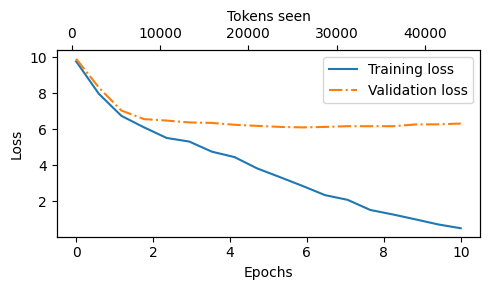

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

### Decoding Strats to control randomness

In [21]:
model.to("cpu")
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [22]:
tokenizer=tiktoken.get_encoding("gpt2")
token_ids=generate_text_simple(
    model=model,
    idx=text_to_token_ids("Every effort moves you",tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n",token_ids_to_text(token_ids,tokenizer))

Output text:
 Every effort moves you?"

"Yes--quite insensible to the irony. She wanted him vindicated--and by me!"




### Decoding strategy 1: Temperature Scaling

In [23]:
#use multinomial sampling
vocab = { 
    "closer": 0,
    "every": 1, 
    "effort": 2, 
    "forward": 3,
    "inches": 4,
    "moves": 5, 
    "pizza": 6,
    "toward": 7,
    "you": 8,
} 

inverse_vocab = {v: k for k, v in vocab.items()}

In [24]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

next_token_logits2 = next_token_logits/0.1

next_token_logits3 = next_token_logits/5

In [25]:
probas = torch.softmax(next_token_logits2, dim=0)

print(probas)



tensor([1.8530e-10, 3.5189e-26, 2.6890e-38, 9.9099e-01, 5.7569e-23, 4.4220e-37,
        2.9718e-38, 9.0133e-03, 2.8514e-22])


In [26]:
probas = torch.softmax(next_token_logits3, dim=0)

print(probas)

tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])


In [27]:
probas = torch.softmax(next_token_logits, dim=0)

print(probas)

next_token_id = torch.argmax(probas).item()

print(next_token_id)

print(inverse_vocab[next_token_id])

tensor([6.0907e-02, 1.6313e-03, 1.0019e-04, 5.7212e-01, 3.4190e-03, 1.3257e-04,
        1.0120e-04, 3.5758e-01, 4.0122e-03])
3
forward


In [28]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

toward


In [29]:
def print_sampled_tokens(probas):
    torch.manual_seed(123) # Manual seed for reproducibility
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

71 x closer
2 x every
0 x effort
544 x forward
2 x inches
1 x moves
0 x pizza
376 x toward
4 x you


In [30]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

# Temperature values
temperatures = [1, 0.1, 5]  # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

##Multinomial

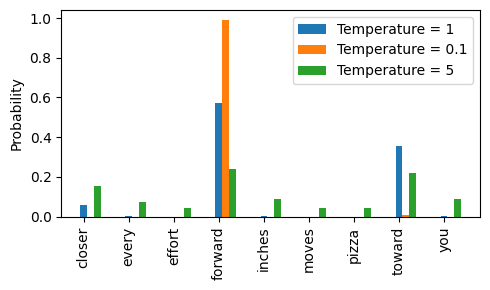

In [31]:
# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()

### Decoding Strategy 2: Top-k Scaling

In [32]:
top_k=3
top_logits,top_pos=torch.topk(next_token_logits,top_k)
print("Top logits:",top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [33]:
new_logits=torch.where(
    condition=next_token_logits < top_logits[-1],
    input=torch.tensor(float("-inf")),
    other=next_token_logits
)
print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [34]:
topk_probas=torch.softmax(new_logits,dim=0)
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


### Merging topk and temperature scaling

In [16]:
def generate(model,idx,max_new_tokens,context_size,temperature=0.0,top_k=None,eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond=idx[:,-context_size:]
        with torch.no_grad():
            logits=model(idx_cond)
        logits=logits[:,-1,:]

        if top_k is not None:
            # keep topk values
            top_logits,_ = torch.topk(logits,top_k)
            min_val=top_logits[:,-1]
            logits=torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device),logits)


        #apply temp scaling
        if temperature >0.0:
            logits=logits/temperature

            # softmax
            probs=torch.softmax(logits,dim=-1) # (batch_size,context_len)

            #sample from distribution 
            idx_next=torch.multinomial(probs,num_samples=1)
        
        #otherwise same as before
        else:
            idx_next=torch.argmax(logits,dim=-1,keepdim=True)
        

        if idx_next== eos_id:
            break
        
        # append sampled text to the sequence
        idx=torch.cat((idx,idx_next),dim=1)

    return idx

In [36]:
torch.manual_seed(123)
token_ids=generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you",tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)
print("Output text:\n",token_ids_to_text(token_ids,tokenizer))

Output text:
 Every effort moves you know began to my surprise, a little it was the
"Ah enough


### Loading and saving model weights

In [37]:
model=GPTModel(GPT_CONFIG_124M)
torch.save(model.state_dict(),"model.pth")

In [38]:
model=GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth"))
model.eval()

/tmp/ipykernel_43641/2906731100.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [39]:
optimizer=torch.optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.1)
torch.save({
    "model_state_dict":model.state_dict(),
    "optimizer_state_dict":optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)

In [40]:
checkpoint=torch.load("model_and_optimizer.pth")
model=GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer=torch.optim.AdamW(model.parameters(),lr=5e-4,weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train()

/tmp/ipykernel_43641/1242810220.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint=torch.load("model_and_optimizer.pth")


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

### Loading pre-trained openAI weights

In [41]:
import tensorflow as tf
import tqdm 
print(tf.__version__)
print(tqdm.__version__)

2025-07-24 22:03:36.675853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753374816.824105   43641 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753374816.869099   43641 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753374817.134710   43641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753374817.134760   43641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753374817.134767   43641 computation_placer.cc:177] computation placer alr

2.19.0
4.67.1


In [42]:
from gpt_download3 import download_and_load_gpt2

In [43]:
settings,params=download_and_load_gpt2(model_size="124M",models_dir="gpt2")

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


2025-07-24 22:03:53.031045: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154389504 exceeds 10% of free system memory.


In [46]:
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}
model_name="gpt2-small (124M)"
NEW_CONFIG=GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])


In [47]:
NEW_CONFIG.update({"context_length":1024,"qkv_bias":True})
gpt=GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [34]:
def assign (left,right):
    if left.shape !=right.shape:
        raise ValueError(f"Shape Mismatch. Left:{left.shape} , Right:{right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [35]:
import numpy as np

def load_weights_into_gpt(gpt,params):
    gpt.pos_emb.weight=assign(gpt.pos_emb.weight,params['wpe'])
    gpt.tok_emb.weight=assign(gpt.tok_emb.weight,params['wte'])
    for b in range (len(params["blocks"])):
        q_w,k_w,v_w=np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3,axis=-1
        )
        gpt.trf_blocks[b].att.W_query.weight=assign(
            gpt.trf_blocks[b].att.W_query.weight,q_w.T
        )
        gpt.trf_blocks[b].att.W_key.weight=assign(
            gpt.trf_blocks[b].att.W_key.weight,k_w.T
        )
        gpt.trf_blocks[b].att.W_value.weight=assign(
            gpt.trf_blocks[b].att.W_value.weight,v_w.T
        )

        q_b,k_b,v_b=np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3,axis=-1
        )
        gpt.trf_blocks[b].att.W_query.bias=assign(
            gpt.trf_blocks[b].att.W_query.bias,q_b
        )
        gpt.trf_blocks[b].att.W_key.bias=assign(
            gpt.trf_blocks[b].att.W_key.bias,k_b
        )
        gpt.trf_blocks[b].att.W_value.bias=assign(
            gpt.trf_blocks[b].att.W_value.bias,v_b
        )


        
        gpt.trf_blocks[b].att.out_proj.weight=assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T
        )
        gpt.trf_blocks[b].att.out_proj.bias=assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"]
        )

        gpt.trf_blocks[b].ff.layers[0].weight=assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T
        )
        gpt.trf_blocks[b].ff.layers[0].bias=assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"]
        )
        gpt.trf_blocks[b].ff.layers[2].weight=assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T
        )
        gpt.trf_blocks[b].ff.layers[2].bias=assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"]
        )


        gpt.trf_blocks[b].norm1.scale=assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"]
        )
        gpt.trf_blocks[b].norm1.shift=assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"]
        )
        gpt.trf_blocks[b].norm2.scale=assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"]
        )
        gpt.trf_blocks[b].norm2.shift=assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"]
        )


    gpt.final_norm.scale=assign(gpt.final_norm.scale,params["g"])
    gpt.final_norm.shift=assign(gpt.final_norm.shift,params["b"])
    gpt.out_head.weight=assign(gpt.out_head.weight,params["wte"])




In [58]:
load_weights_into_gpt(gpt,params)
gpt.to(device);

In [2]:
torch.manual_seed(123)
token_ids=generate(
    model=gpt,
    idx=text_to_token_ids("Every effort moves you",tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1
)
print("Output text:\n",token_ids_to_text(token_ids,tokenizer))

NameError: name 'torch' is not defined

### Fine tuning
instruction based classification based finetuning

### All the code before
its anoying scrolling up and down

In [10]:
# Add to a cell and run after restart
%reset -f
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.4%


In [11]:

import torch
import torch.nn as nn
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        # we have to group by the number of heads
        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

#combine the separate elements youve added
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps=1e-5
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))

    def forward(self,x):
        mean=x.mean(dim=-1,keepdim=True)
        var=x.var(dim=-1,keepdim=True,unbiased=False)
        norm_x=(x-mean)/torch.sqrt(var+self.eps)
        return self.scale * norm_x + self.shift
        # when unbiased= True then we get bessels correction where the denominator is n-1 not n 

class GELU(nn.Module):
    def __init__(self):
       super().__init__()
    def forward (self,x):
       return 0.5 * x * (1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(x+ 0.044715 * torch.pow(x,3))))  
        
class FeedForward(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(cfg["emb_dim"],4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"])
        )
    def forward(self,x):
        return self.layers(x)



class TransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.att=MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff=FeedForward(cfg)
        self.norm1=LayerNorm(cfg["emb_dim"])
        self.norm2=LayerNorm(cfg["emb_dim"])
        self.drop_shortcut=nn.Dropout(cfg["drop_rate"])
    
    def forward(self,x):
        shortcut=x
        x=self.norm1(x)
        x=self.att(x)
        x=self.drop_shortcut(x)
        x=x+shortcut

        shortcut=x
        x=self.norm2(x)
        x=self.ff(x)
        x=self.drop_shortcut(x)
        x=x+shortcut

        return x



        

import torch.nn as nn 
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches


def evaluate_model(model,train_loader,val_loader,device,eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss=calc_loss_loader(train_loader,model,device,num_batches=eval_iter)
        val_loss=calc_loss_loader(val_loader,model,device,num_batches=eval_iter)
    model.train()
    return train_loss,val_loss

def generate_text_simple(model, idx, max_new_tokens,context_size):
    # idx is (batch,n_tokens)
    for _ in range(max_new_tokens):
        idx_cond=idx[:,-context_size:] #if input size > context size, we select only the lasr elements the size of context size

        with torch.no_grad():
            logits =model(idx_cond) #get predictions 
        
        logits=logits[:,-1,:] # last row 

        # convert logits into probabilities by applying softmax

        probas = torch.softmax(logits,dim=-1)

        # Get the idx of the vocab entry with highest priority
        idx_next =torch.argmax(probas, dim =-1 , keepdim =True )

        # append it to the running sequence 

        idx= torch.cat((idx,idx_next),dim=-1)

    return idx


import tiktoken
def text_to_token_ids(text,tokenizer):
    encoded =tokenizer.encode(text,allowed_special={'<|endoftext|>'})
    encoded_tensor=torch.tensor(encoded).unsqueeze(0) # adding batch dimension 
    return encoded_tensor

def token_ids_to_text(token_ids,tokenizer):
    flat=token_ids.squeeze(0) #remove batch dimension 
    return tokenizer.decode(flat.tolist())


def generate_and_print_sample(model,tokenizer,device,start_context):
    model.eval()
    context_size=model.pos_emb.weight.shape[0]
    encoded=text_to_token_ids(start_context,tokenizer).to(device)
    with torch.no_grad():
        token_ids=generate_text_simple(
            model=model,idx=encoded,
            max_new_tokens=50,context_size=context_size
        )
    decoded_text=token_ids_to_text(token_ids,tokenizer)
    print(decoded_text.replace("\n"," "))
    model.train

def train_model_simple(model,train_loader,val_loader,optimizer,device,num_epochs,eval_freq,eval_iter,start_context,tokenizer):
    train_losses,val_losses, track_tokens_seen =[],[],[]
    tokens_seen,global_step=0,-1

    #Main training loop 
    for epoch in range(num_epochs):
        model.train()# set model to training mode
        for input_batch,target_batch in train_loader:
            optimizer.zero_grad()
            loss=calc_loss_batch(input_batch,target_batch,model,device)
            loss.backward()#calculate loss gradients
            optimizer.step()# update model weights using loss gradients
            tokens_seen+=input_batch.numel() #returns total number of tokens
            global_step+=1

            #evaluation
            if global_step % eval_freq ==0:
                train_loss,val_loss=evaluate_model(
                    model,train_loader,val_loader,device,eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}):"
                      f"Train Loss {train_loss:.3f}, Val Loss {val_loss:.3f}")
        # print sample after each epoch
        generate_and_print_sample(
            model,tokenizer,device,start_context
        )
    return train_losses,val_losses,track_tokens_seen

def generate(model,idx,max_new_tokens,context_size,temperature=0.0,top_k=None,eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond=idx[:,-context_size:]
        with torch.no_grad():
            logits=model(idx_cond)
        logits=logits[:,-1,:]

        if top_k is not None:
            # keep topk values
            top_logits,_ = torch.topk(logits,top_k)
            min_val=top_logits[:,-1]
            logits=torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device),logits)


        #apply temp scaling
        if temperature >0.0:
            logits=logits/temperature

            # softmax
            probs=torch.softmax(logits,dim=-1) # (batch_size,context_len)

            #sample from distribution 
            idx_next=torch.multinomial(probs,num_samples=1)
        
        #otherwise same as before
        else:
            idx_next=torch.argmax(logits,dim=-1,keepdim=True)
        

        if idx_next== eos_id:
            break
        
        # append sampled text to the sequence
        idx=torch.cat((idx,idx_next),dim=1)

    return idx

def assign (left,right):
    if left.shape !=right.shape:
        raise ValueError(f"Shape Mismatch. Left:{left.shape} , Right:{right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

import numpy as np

def load_weights_into_gpt(gpt,params):
    gpt.pos_emb.weight=assign(gpt.pos_emb.weight,params['wpe'])
    gpt.tok_emb.weight=assign(gpt.tok_emb.weight,params['wte'])
    for b in range (len(params["blocks"])):
        q_w,k_w,v_w=np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3,axis=-1
        )
        gpt.trf_blocks[b].att.W_query.weight=assign(
            gpt.trf_blocks[b].att.W_query.weight,q_w.T
        )
        gpt.trf_blocks[b].att.W_key.weight=assign(
            gpt.trf_blocks[b].att.W_key.weight,k_w.T
        )
        gpt.trf_blocks[b].att.W_value.weight=assign(
            gpt.trf_blocks[b].att.W_value.weight,v_w.T
        )

        q_b,k_b,v_b=np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3,axis=-1
        )
        gpt.trf_blocks[b].att.W_query.bias=assign(
            gpt.trf_blocks[b].att.W_query.bias,q_b
        )
        gpt.trf_blocks[b].att.W_key.bias=assign(
            gpt.trf_blocks[b].att.W_key.bias,k_b
        )
        gpt.trf_blocks[b].att.W_value.bias=assign(
            gpt.trf_blocks[b].att.W_value.bias,v_b
        )


        
        gpt.trf_blocks[b].att.out_proj.weight=assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T
        )
        gpt.trf_blocks[b].att.out_proj.bias=assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"]
        )

        gpt.trf_blocks[b].ff.layers[0].weight=assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T
        )
        gpt.trf_blocks[b].ff.layers[0].bias=assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"]
        )
        gpt.trf_blocks[b].ff.layers[2].weight=assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T
        )
        gpt.trf_blocks[b].ff.layers[2].bias=assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"]
        )


        gpt.trf_blocks[b].norm1.scale=assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"]
        )
        gpt.trf_blocks[b].norm1.shift=assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"]
        )
        gpt.trf_blocks[b].norm2.scale=assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"]
        )
        gpt.trf_blocks[b].norm2.shift=assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"]
        )


    gpt.final_norm.scale=assign(gpt.final_norm.scale,params["g"])
    gpt.final_norm.shift=assign(gpt.final_norm.shift,params["b"])
    gpt.out_head.weight=assign(gpt.out_head.weight,params["wte"])


import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")



Memory usage: 44.3%


In [12]:
# parameter efficient finetuning (PEFT) like Lora and QLora
import json
import os
import urllib
import ssl

def download_and_load_file(file_path, url):
    ssl_context = ssl.create_default_context()
    ssl_context.check_hostname = False
    ssl_context.verify_mode = ssl.CERT_NONE

    if not os.path.exists(file_path):
        with urllib.request.urlopen(url, context=ssl_context) as response:
            text_data = response.read().decode("utf-8")
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(text_data)
    else:
        with open(file_path, "r", encoding="utf-8") as file:
            text_data = file.read()

    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    return data


file_path = "instruction-data.json"
url = (
    "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch"
    "/main/ch07/01_main-chapter-code/instruction-data.json"
)

data = download_and_load_file(file_path, url)
print("Number of entries:", len(data))
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")


Number of entries: 1100
Memory usage: 44.1%


In [13]:
#Converting the instructions to the alpaca format
def format_input(entry):
    instruction_text = (
        f"Below is an instruction that describes a task. "
        f"Write a response that appropriately completes the request."
        f"\n\n### Instruction:\n{entry['instruction']}"
    )

    input_text = f"\n\n### Input:\n{entry['input']}" if entry["input"] else ""

    return instruction_text + input_text
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.2%


In [14]:
model_input = format_input(data[50])
desired_response = f"\n\n### Response:\n{data[50]['output']}"

print(model_input + desired_response)

print(f"Memory usage: {psutil.virtual_memory().percent}%")

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Identify the correct spelling of the following word.

### Input:
Ocassion

### Response:
The correct spelling is 'Occasion.'
Memory usage: 44.1%


In [15]:
train_portion = int(len(data) * 0.85)  # 85% for training
test_portion = int(len(data) * 0.1)    # 10% for testing
val_portion = len(data) - train_portion - test_portion  # Remaining 5% for validation

train_data = data[:train_portion]
test_data = data[train_portion:train_portion + test_portion]
val_data = data[train_portion + test_portion:]
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.1%


In [16]:
print("Training set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Training set length: 935
Validation set length: 55
Test set length: 110
Memory usage: 44.0%


In [17]:
import torch
from torch.utils.data import Dataset


class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data

        # Pre-tokenize texts
        self.encoded_texts = []
        for entry in data:
            instruction_plus_input = format_input(entry)
            response_text = f"\n\n### Response:\n{entry['output']}"
            full_text = instruction_plus_input + response_text
            self.encoded_texts.append(
                tokenizer.encode(full_text)
            )

    def __getitem__(self, index):
        return self.encoded_texts[index]

    def __len__(self):
        return len(self.data)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.3%


In [18]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))
print(f"Memory usage: {psutil.virtual_memory().percent}%")

[50256]
Memory usage: 44.6%


In [19]:
def custom_collate_draft_1(
    batch,
    pad_token_id=50256,
    device="cpu"
):
    # Find the longest sequence in the batch
    # and increase the max length by +1, which will add one extra
    # padding token below
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs
    inputs_lst = []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to batch_max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        # Via padded[:-1], we remove the extra padded token
        # that has been added via the +1 setting in batch_max_length
        # (the extra padding token will be relevant in later codes)
        inputs = torch.tensor(padded[:-1])
        inputs_lst.append(inputs)

    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    return inputs_tensor
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.6%


In [20]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

print(custom_collate_draft_1(batch))
print(f"Memory usage: {psutil.virtual_memory().percent}%")

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
Memory usage: 44.6%


In [21]:
def custom_collate_draft_2(
    batch,
    pad_token_id=50256,
    device="cpu"
):
    # Find the longest sequence in the batch
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs
    inputs_lst, targets_lst = [], []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        inputs = torch.tensor(padded[:-1])  # Truncate the last token for inputs
        targets = torch.tensor(padded[1:])  # Shift +1 to the right for targets
        inputs_lst.append(inputs)
        targets_lst.append(targets)

    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)
    return inputs_tensor, targets_tensor
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.6%


In [22]:
def custom_collate_fn(
    batch,
    pad_token_id=50256,
    ignore_index=-100,
    allowed_max_length=None,
    device="cpu"
):
    # Find the longest sequence in the batch
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs and targets
    inputs_lst, targets_lst = [], []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        inputs = torch.tensor(padded[:-1])  # Truncate the last token for inputs
        targets = torch.tensor(padded[1:])  # Shift +1 to the right for targets

        # New: Replace all but the first padding tokens in targets by ignore_index
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        if indices.numel() > 1:
            targets[indices[1:]] = ignore_index

        # New: Optionally truncate to maximum sequence length
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]

        inputs_lst.append(inputs)
        targets_lst.append(targets)

    # Convert list of inputs and targets to tensors and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)

    return inputs_tensor, targets_tensor
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.4%


In [23]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = custom_collate_fn(batch)
print(inputs)
print(targets)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256,  -100,  -100,  -100],
        [    8,     9, 50256,  -100,  -100]])
Memory usage: 44.3%


In [24]:
# Masking the target tokrn ids
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is much faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")

print("Device:", device)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Device: cpu
Memory usage: 44.2%


In [25]:
from functools import partial
customized_collate_fn = partial(custom_collate_fn, device=device, allowed_max_length=1024)

In [26]:
from torch.utils.data import DataLoader


num_workers = 0
batch_size = 1 #originally 8 but the system is not able to handle it

torch.manual_seed(123)

train_dataset = InstructionDataset(train_data, tokenizer)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers
)

val_dataset = InstructionDataset(val_data, tokenizer)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

test_dataset = InstructionDataset(test_data, tokenizer)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 44.6%


In [27]:
print("Train loader:")
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Train loader:
torch.Size([1, 61]) torch.Size([1, 61])
torch.Size([1, 48]) torch.Size([1, 48])
torch.Size([1, 55]) torch.Size([1, 55])
torch.Size([1, 53]) torch.Size([1, 53])
torch.Size([1, 53]) torch.Size([1, 53])
torch.Size([1, 58]) torch.Size([1, 58])
torch.Size([1, 44]) torch.Size([1, 44])
torch.Size([1, 58]) torch.Size([1, 58])
torch.Size([1, 43]) torch.Size([1, 43])
torch.Size([1, 62]) torch.Size([1, 62])
torch.Size([1, 47]) torch.Size([1, 47])
torch.Size([1, 47]) torch.Size([1, 47])
torch.Size([1, 61]) torch.Size([1, 61])
torch.Size([1, 76]) torch.Size([1, 76])
torch.Size([1, 54]) torch.Size([1, 54])
torch.Size([1, 49]) torch.Size([1, 49])
torch.Size([1, 61]) torch.Size([1, 61])
torch.Size([1, 67]) torch.Size([1, 67])
torch.Size([1, 73]) torch.Size([1, 73])
torch.Size([1, 62]) torch.Size([1, 62])
torch.Size([1, 50]) torch.Size([1, 50])
torch.Size([1, 46]) torch.Size([1, 46])
torch.Size([1, 55]) torch.Size([1, 55])
torch.Size([1, 49]) torch.Size([1, 49])
torch.Size([1, 68]) torch.

In [29]:
from gpt_download3 import download_and_load_gpt2

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length":1024, #original value is 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

CHOOSE_MODEL = "gpt2-small (124M)"

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(
    model_size=model_size,
    models_dir="gpt2"
)

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();
print(f"Memory usage: {psutil.virtual_memory().percent}%")

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe
Memory usage: 75.8%


In [30]:
text_1 = "Every effort moves you"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1, tokenizer),
    max_new_tokens=15,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Every effort moves you forward.

The first step is to understand the importance of your work
Memory usage: 74.4%


In [31]:
torch.manual_seed(123)
input_text = format_input(val_data[0])
print(input_text)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Convert the active sentence to passive: 'The chef cooks the meal every day.'


In [32]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0: 
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen
print(f"Memory usage: {psutil.virtual_memory().percent}%")


Memory usage: 75.3%


In [33]:
model.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)


Training loss: 4.015831232070923
Validation loss: 4.1442711353302


In [34]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005, weight_decay=0.1)

num_epochs = 1

train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context=format_input(val_data[0]), tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 3.250, Val loss 3.279
Ep 1 (Step 000005): Train loss 1.987, Val loss 1.818
Ep 1 (Step 000010): Train loss 1.018, Val loss 1.371
Ep 1 (Step 000015): Train loss 1.320, Val loss 1.285
Ep 1 (Step 000020): Train loss 0.794, Val loss 1.220
Ep 1 (Step 000025): Train loss 0.878, Val loss 1.163
Ep 1 (Step 000030): Train loss 0.978, Val loss 1.136
Ep 1 (Step 000035): Train loss 1.111, Val loss 1.125
Ep 1 (Step 000040): Train loss 1.158, Val loss 1.076
Ep 1 (Step 000045): Train loss 0.750, Val loss 1.048
Ep 1 (Step 000050): Train loss 1.156, Val loss 1.019
Ep 1 (Step 000055): Train loss 1.190, Val loss 1.012
Ep 1 (Step 000060): Train loss 1.122, Val loss 1.035
Ep 1 (Step 000065): Train loss 0.934, Val loss 1.034
Ep 1 (Step 000070): Train loss 0.625, Val loss 1.044
Ep 1 (Step 000075): Train loss 0.685, Val loss 1.042
Ep 1 (Step 000080): Train loss 0.910, Val loss 1.053
Ep 1 (Step 000085): Train loss 0.699, Val loss 1.077
Ep 1 (Step 000090): Train loss 0.860, Val loss

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

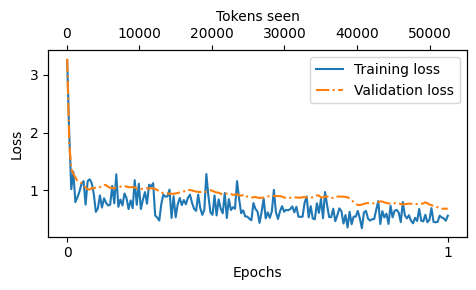

In [36]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [37]:
torch.manual_seed(123)


for entry in test_data[:3]:

    input_text = format_input(entry)

    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = (
        generated_text[len(input_text):]
        .replace("### Response:", "")
        .strip()
)

    print(input_text)
    print(f"\nCorrect response:\n>> {entry['output']}")
    print(f"\nModel response:\n>> {response_text.strip()}")
    print("-------------------------------------")

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Rewrite the sentence using a simile.

### Input:
The car is very fast.

Correct response:
>> The car is as fast as lightning.

Model response:
>> The car is as fast as a bullet.
-------------------------------------
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What type of cloud is typically associated with thunderstorms?

Correct response:
>> The type of cloud typically associated with thunderstorms is cumulonimbus.

Model response:
>> The type of cloud typically associated with thunderstorms is a superstorm.
-------------------------------------
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Name the author of 'Pride and Prejudice'.

Correct response:
>> Jane Austen.

Model response:
>> The author of 'Pride a